# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn as imb
import requests
import shap

# Geolocation 
from geopy.geocoders import Nominatim
from haversine import haversine,Unit

# ML Model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

c:\Users\M. Wahid Mudzakir\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Load Dataset**

In [2]:
df = pd.read_csv('delivery_train.csv')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

# **Background & Objective**

## Background

    Saat pandemi, semua orang di wajibkan untuk beraktifitas di dalam rumah, karena hal ini banyak layanan berbasis online sangat diminati oleh konsumen salah satunya adalah layanan food delivery. Namun pandemi covid semakin lama semakin mereda, apakah konsumen akan tetap menggunakan jasa food delivery meskipun pandemi telah berakhir? dan bagaimana caranya agar perusahaan food delivery dapat terus meningkatkan layanan mereka?. Penelitian ini bertujuan untuk menjawab masalah-masalah tersebut.

## Objective

1. Bagaimana jumlah order tiap bulanya selama tahun 2022? pada bulan apa jumlah order palinng banyak? dan pada bulan apa jumlah order paling sedikit?
2. Pada hari apa customer paling banyak melakukan order, dan pada hari apa customer paling sedikit melakukan order?
3. Pada rentang waktu apa customer paling banyak melakukan order? dan pada rentang waktu apacustomer paling sedikit melakukan order?
4. Berapa lama rata-rata waktu yang dibutuhkan restoran untuk menyiapkan makanan untuk tiap kategorinya?
5. Faktor apa saja yang mempengaruhi customer dalam memberikan penilaian/rating terhadap layanan?
6. Membuat model machine learning yang dapat memprediksi rating yang akan diberikan oleh customer

# **Function**

In [4]:
# Fungsi Persentase
def persentase(sampel:float, populasi:float) -> float:
    '''Menghitung persentase sampel dalam populasi'''
    xx = sampel/populasi*100
    print(round(xx,2),'%')

# Menghitung Jarak
def jarak(i: int):
    '''Menghitung jarak dalam KM menggunakan haversine'''
    A = (df['Restaurant_latitude'][i], df['Restaurant_latitude'][i])
    B = (df['Delivery_location_latitude'][i], df['Delivery_location_latitude'][i])
    d = haversine(A,B, unit=Unit.KILOMETERS)
    return round(d,2)

# Menghitung waktu penyajian
def time_minute(i: int):
    '''Menghitung waktu yang dibutuhkan atara waktu pengambilan dan waktu di order dalam menit'''
    a = int((df['Time_Order_picked'][i] - df['Time_Orderd'][i]).total_seconds()/60)
    return a

# Mencari nama kota
def get_city(latitude: float, longitude: float):
    API_KEY = "xxxxxxxxx"
    URL = f"https://maps.googleapis.com/maps/api/geocode/json?latlng={latitude},{longitude}&key={API_KEY}"
    
    response = requests.get(URL)
    data = response.json()
    
    if data['status'] == 'OK':
        for result in data['results']:
            if 'locality' in result['types']:
                return result['address_components'][0]['long_name']
    
    return 'Nan '

# **Data Handling & Cleaning**

## Menseleksi Missing Value

In [5]:
# data numerik
df_age = df[df['Delivery_person_Age']=='NaN '] 
df_rating = df[df['Delivery_person_Ratings']=='NaN '] 
df_multi = df[df['multiple_deliveries']=='NaN '] 

# data kategorik
df_festival = df[df['Festival']=='NaN '] 
df_weather = df[df['Weatherconditions']=='conditions NaN'] 
df_traffic = df[df['Road_traffic_density']=='NaN ']  
df_city = df[df['City']=='NaN '] 

## City Location

### Mencari nama kota

In [6]:
kota = []
for x,(y,z) in enumerate(df_city[['Restaurant_latitude','Restaurant_longitude']].values):
    city = get_city(y, z)
    kota.append(city)


In [7]:
dict_kota = {'index':df_city.index,
    'Restaurant_latitude':df_city['Restaurant_latitude'],
    'Restaurant_longitude':df_city['Restaurant_longitude'],
    'kota' : kota}
acc = pd.DataFrame(dict_kota)
acc.set_index('index')


,Restaurant_latitude,Restaurant_longitude,kota
index,,,
58,26.888420,75.800689,Jaipur
116,12.297954,76.665169,Mysuru
140,18.543626,73.905101,Pune
150,12.980410,77.640489,Bengaluru
206,11.001753,76.986241,Coimbatore
...,...,...,...
45417,21.175104,72.804342,Surat
45496,13.044694,80.261470,Chennai
45504,-12.978453,-77.643685,Nan


### Klasifikasi Kota

In [8]:
target_metro = ['Mumbai', 'Bengaluru', 'Chennai', 'Hyderabad', 'Kolkata', 'Pune', 'Secunderabad', 'Ahmedabad', 'Indore']
target_urban = ['Jaipur', 'Ludhiana', 'Coimbatore', 'Mysuru', 'Vadodara', 'Surat', 'Ernakulam', 'Aurangabad', 'Prayagraj', 
                'Kanpur', 'Dehradun', 'Bhopal','Agra', 'Kochi', 'Thane', 'Panaji']
target_semi = ['Ranchi', 'Kurichi', 'Pimpri-Chinchwad', 'Laxmipura', 'Nataniwala', 'Kothaguda', 'Nanakaramguda', 'Kakkanad', 'Nerul',
               'Rundh', 'Mobor Beach', 'Dumardaga', 'Baga', 'Candolim', 'Arpora', 'Calangute', 'Betalbatim', 'Anjuna', 'Laxmipura at Nataniwala', 'Nataniwala']

acc[acc['kota'].isin(target_metro)] = 'Metropolitian '
acc[acc['kota'].isin(target_urban)] = 'Urban '
acc[acc['kota'].isin(target_semi)] = 'Semi-Urban '
acc[acc['kota'] == 'Nan '] = 'Metropolitian '


In [9]:
df.loc[df_city.index, 'City'] = acc['kota']

## Data Kategorik

In [10]:
# Mencari modus untuk dimasukkan ke dalam missing value
a = df['multiple_deliveries'].value_counts()
b = df['Festival'].value_counts()
c = df['Weatherconditions'].value_counts()
d = df['Road_traffic_density'].value_counts()

1. Diketahui bahwa frekuensi paling banyak pada kolom "multiple_deliveries" adalah **"1"**.<br/>
2. Diketahui bahwa frekuensi paling banyak pada kolom "Festival" adalah **"No"**.<br/>
3. Diketahui bahwa frekuensi paling banyak pada kolom "Weatherconditions" adalah **"condition Fog"**.<br/>
4. Diketahui bahwa frekuensi paling banyak pada kolom "Road_traffic_density" adalah **"Low"**.<br/>

### Mengganti missing value dengan frekuensi data terbanyak

In [11]:
df.loc[df['multiple_deliveries']=='NaN ', 'multiple_deliveries'] = 1
df.loc[df['Festival']=='NaN ', 'Festival'] = 'No '
df.loc[df['Weatherconditions']=='conditions NaN', 'Weatherconditions'] = 'conditions Fog'
df.loc[df['Road_traffic_density']=='NaN ', 'Road_traffic_density'] = 'Low '


## Data Numerik

### Mencari nilai median untuk mengisi missing value

In [12]:
age_median = df['Delivery_person_Age'].median()
rating_median = df['Delivery_person_Ratings'].median()

### Mengubah nilai "NaN" menjadi median

In [13]:
df.loc[df['Delivery_person_Age']=='NaN ', 'Delivery_person_Age'] = age_median
df.loc[df['Delivery_person_Ratings']=='NaN ', 'Delivery_person_Ratings'] = rating_median


### Mengubah tipe data pada tiap kolom 

In [14]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(int)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)
df['multiple_deliveries'] = df['multiple_deliveries'].astype(int)

#### Menghapus str (min) pada kolom "Time_taken(min)"

In [15]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('[(min)]','',regex=True).astype(int)

## Drop Data

### Drop string 'Nan ' di kolom 'Time_Orderd'

In [16]:
# Seleksi NaN Value
time_drop = df[df['Time_Orderd']=='NaN '].index

# Drop value NaN yang telah di seleksi
df = df.drop(index=time_drop).reset_index()

In [17]:
# drop kolom 'index','ID', 'Delivery_person_ID', 'Time_Order_picked'
df = df.drop(['index','ID', 'Delivery_person_ID'], axis=1)

## Datetime

### Mengubah kolom Order_Date & Time_Orderd menjadi format waktu

In [18]:
# Convert data ke bentuk datetime 
df['Order_Date'] = pd.to_datetime(df['Order_Date']);

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


In [19]:
# Convert data ke bentuk waktu/time
df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

### Menghitung lama penyajian makanan

In [20]:
df['Time_Order_picked'] = df.apply(lambda x: x['Time_Order_picked'] + pd.Timedelta(hours=24) if x['Time_Order_picked'] < x['Time_Orderd'] 
                                                                                             else x['Time_Order_picked'], axis=1)

In [21]:
cooking = []

for i in range(len(df)):
    a = time_minute(i)
    cooking.append(a)

df['cooking_time'] = cooking

### Menambahkan kolom bulan

In [22]:
df['bulan'] = df['Order_Date'].dt.month

### Menambahkan kolom nama hari 

In [23]:
nama_hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

hari = df['Order_Date'].dt.dayofweek.apply(lambda x: nama_hari[x])
df['hari'] = hari

### Grouping waktu menjadi (pagi, siang, sore & malam)

In [24]:
waktu = []

for i in df.index:
    t = df.loc[i, 'Time_Orderd']

    # convert string ke time
    pagi = pd.to_timedelta('10:00:00')
    siang = pd.to_timedelta('14:00:00')
    sore = pd.to_timedelta('18:00:00')

    # loop
    if t <= pagi:
        a = 'pagi'
        waktu.append(a)
    elif t > pagi and t <= siang:
        a = 'siang'
        waktu.append(a)
    elif t > siang and t <= sore:
        a = 'sore'
        waktu.append(a)
    else:
        a = 'malam'
        waktu.append(a)

df['waktu'] = waktu

## Menghitung jarak antara restoran dan lokasi penerima

In [25]:
dis = []

for i in range(len(df.index)):
    d = jarak(i)
    dis.append(d)

df['jarak(KM)'] = dis

In [26]:
#df.to_csv('delivery.csv')

### Drop kolom latitude dan longitude

In [27]:
df = df.drop(['Restaurant_latitude',
              'Restaurant_longitude', 
              'Delivery_location_latitude', 
              'Delivery_location_longitude'], axis=1)

## Cek Outlier

In [28]:
nums = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken(min)', 'cooking_time', 'jarak(KM)']

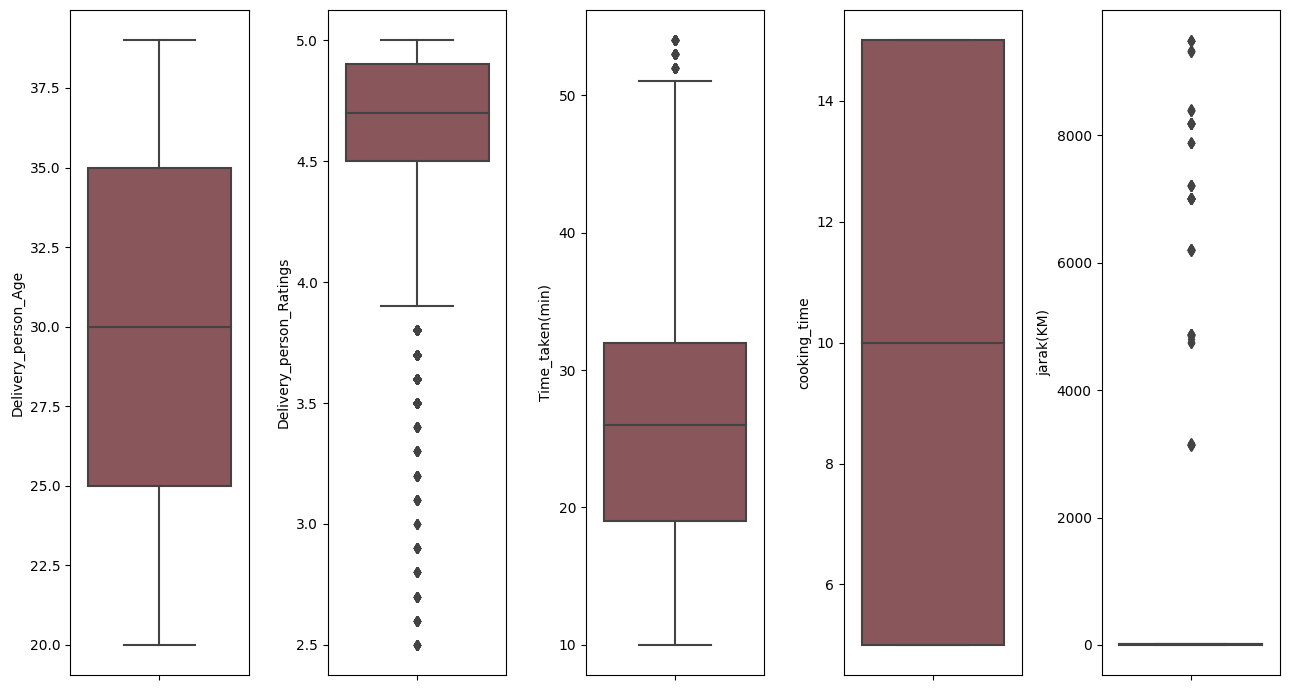

In [29]:
figura = plt.figure(figsize=(13,7))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='#904E55')
    plt.tight_layout()

Terdapat outlier dari perhitungan jarak yang tidak masuk akal, untuk itu outlier tersebut akan di drop

In [30]:
df = df.drop(index=df[df['jarak(KM)']>= 2000].index).reset_index()

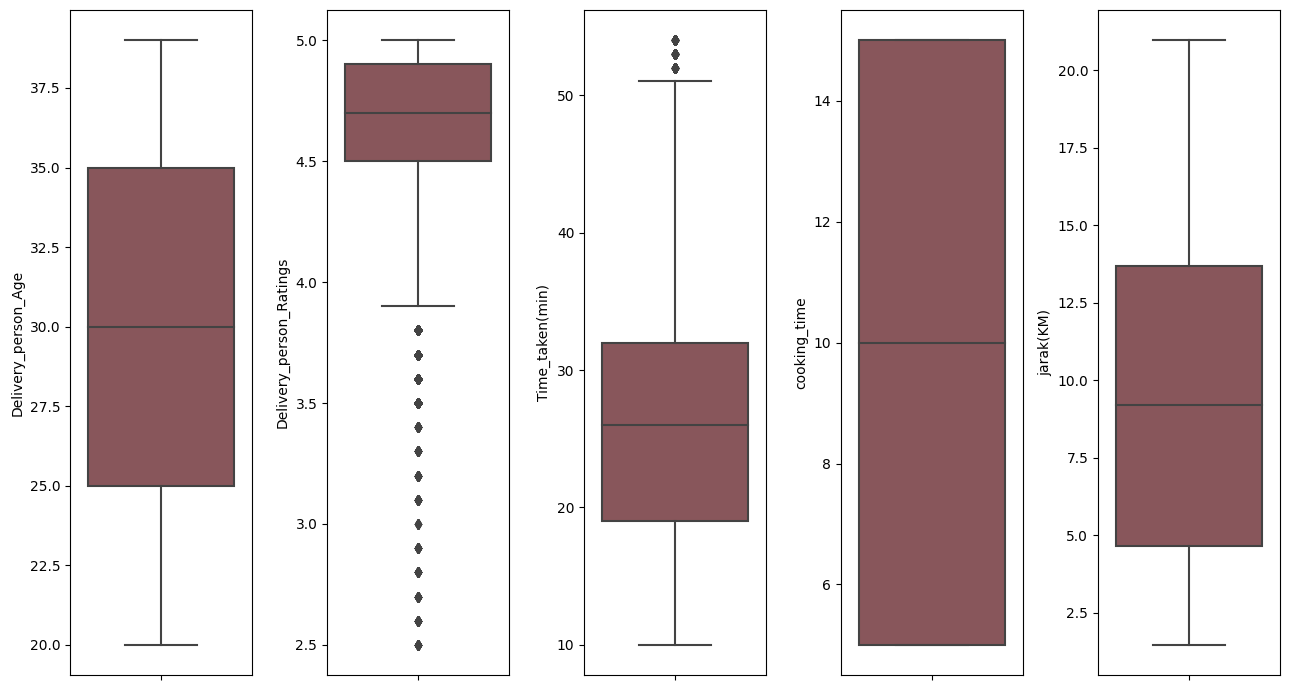

In [31]:
figura = plt.figure(figsize=(13,7))

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='#904E55')
    plt.tight_layout()

# **Encoding Data Kategorik**

In [32]:
# Kolom Festival

le = preprocessing.LabelEncoder()
le.fit(df['Festival'])
df['Festival'] = le.transform(df['Festival'])

### Maping Encoding

In [33]:
#Maping kategorikal data

weather = {'conditions Sunny' : 1,
'conditions Cloudy' : 2,
'conditions Windy' : 3,
'conditions Fog' : 4,
'conditions Sandstorms' : 5,
'conditions Stormy' : 6,
}

vehicle = {'motorcycle ' : 1,
'scooter ' : 2,
'electric_scooter ' : 3,
'bicycle ' : 4 }

traffic = {'Low ' : 0,
'Medium ' : 1,
'High ' : 2,
'Jam ' : 3 }

food = {'Snack ' : 1,
'Meal ' : 2,
'Drinks ' : 3,
'Buffet ' : 4 }

city = {'Metropolitian ' : 1,
'Urban ' : 2,
'Semi-Urban ' : 3 }

data_hari = {'Senin' : 1,
'Selasa' : 2,
'Rabu' : 3,
'Kamis' : 4,
'Jumat' : 5,
'Sabtu' : 6,
'Minggu' : 7}

data_waktu = {'pagi' : 1,
'siang' : 2,
'sore' : 3,
'malam' : 4}

In [34]:
df['Weatherconditions'] = df['Weatherconditions'].map(weather)
df['Type_of_vehicle'] = df['Type_of_vehicle'].map(vehicle)
df['Road_traffic_density'] = df['Road_traffic_density'].map(traffic)
df['Type_of_order'] = df['Type_of_order'].map(food)
df['City'] = df['City'].map(city)
df['hari'] = df['hari'].map(data_hari)
df['waktu'] = df['waktu'].map(data_waktu)

In [35]:
df = df.drop(columns='index')

# **Analisis Data**

In [36]:
count_value = [1]*len(df)
df['count'] = count_value
df

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),cooking_time,bulan,hari,waktu,jarak(KM),count
0,37,4.9,2022-03-19,0 days 11:30:00,0 days 11:45:00,1,2,2,1,1,0,0,2,24,15,3,6,2,3.03,1
1,34,4.5,2022-03-25,0 days 19:45:00,0 days 19:50:00,6,3,2,1,2,1,0,1,33,5,3,5,4,20.18,1
2,23,4.4,2022-03-19,0 days 08:30:00,0 days 08:45:00,5,0,0,3,1,1,0,2,26,15,3,6,1,1.55,1
3,38,4.7,2022-05-04,0 days 18:00:00,0 days 18:10:00,1,1,0,4,1,1,0,1,21,10,5,3,3,7.79,1
4,32,4.6,2022-03-26,0 days 13:30:00,0 days 13:45:00,2,2,1,1,2,1,0,1,30,15,3,6,2,6.21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43701,30,4.8,2022-03-24,0 days 11:35:00,0 days 11:45:00,3,2,1,2,1,0,0,1,32,10,3,4,2,1.49,1
43702,21,4.6,2022-02-16,0 days 19:55:00,0 days 20:10:00,3,3,0,4,1,1,0,1,36,15,2,3,4,11.01,1
43703,30,4.9,2022-11-03,0 days 23:50:00,1 days 00:05:00,2,0,1,3,2,0,0,1,16,15,11,4,4,4.66,1
43704,20,4.7,2022-07-03,0 days 13:35:00,0 days 13:40:00,2,2,0,1,1,1,0,1,26,5,7,7,2,6.23,1


## Jumlah Order Perbulan

In [37]:
count_snack = df.groupby([df['Order_Date'].dt.month])['count'].sum().reset_index().sort_values(['Order_Date', 'count'], ascending=[True, False])
count_snack

,Order_Date,count
0,1,2180
1,2,7000
2,3,20711
3,4,1857
4,5,2223
5,6,1873
6,7,1103
7,8,923
8,9,1121
9,10,953


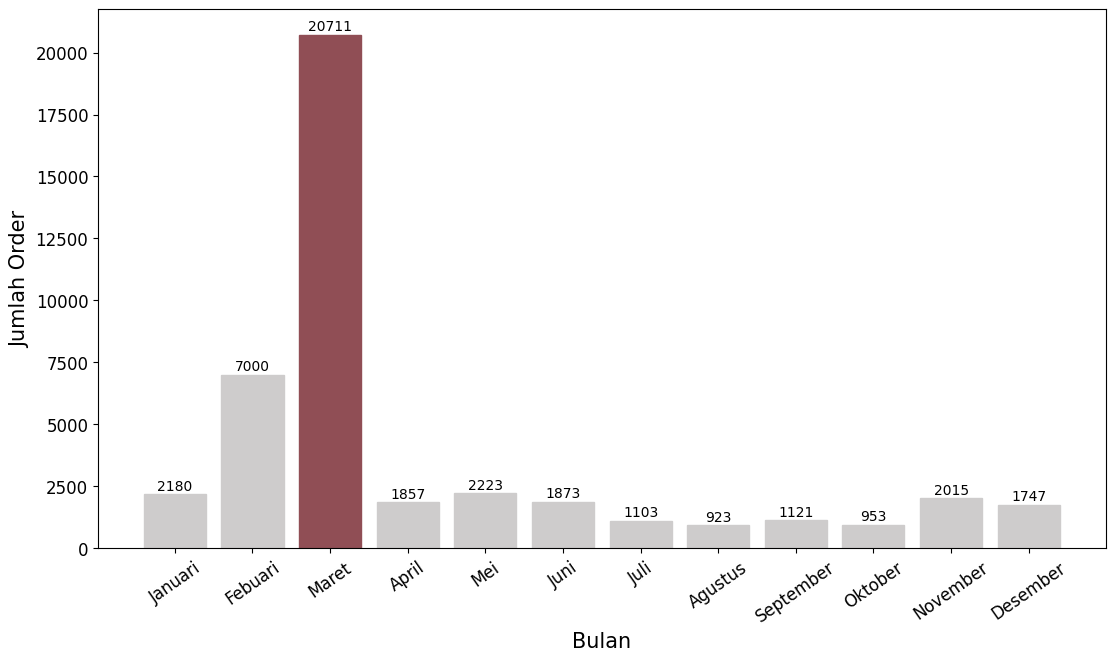

In [38]:
bln = ['Januari', 'Febuari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
max_value = max(count_snack['count'])

figura = plt.figure(figsize=(13,7))
graph = figura.add_subplot()

barlist = graph.bar(bln, count_snack['count'])
for i in range(len(barlist)):
    if count_snack['count'][i] == max_value:
        barlist[i].set_color('#904E55')
    else:
        barlist[i].set_color('#CECCCC')

plt.xlabel('Bulan', fontsize=15)
plt.ylabel('Jumlah Order', fontsize=15)
graph.tick_params(axis='x', labelrotation=35, labelsize=12)
graph.tick_params(axis='y', labelsize=12)

for i, v in enumerate(count_snack['count']):
    graph.text(i, v+175, v, ha='center')

In [39]:
data_grup = pd.DataFrame(df.groupby(['bulan','hari', 'waktu'])['count'].sum()).sort_values(['bulan', 'hari', 'waktu']).reset_index()
data_grup[(data_grup['bulan']==1)]
# & (data_grup['hari']==1)

,bulan,hari,waktu,count
0,1,1,1,210
1,1,1,2,226
2,1,1,3,198
3,1,1,4,447
4,1,2,1,195
5,1,2,2,248
6,1,2,3,198
7,1,2,4,458


## Jumlah Order Perhari

In [40]:
perday = df.groupby(df['hari'])['count'].sum().reset_index().sort_values('hari', ascending=True)
perday

,hari,count
0,1,6893
1,2,5176
2,3,6743
3,4,7210
4,5,6521
5,6,5207
6,7,5956


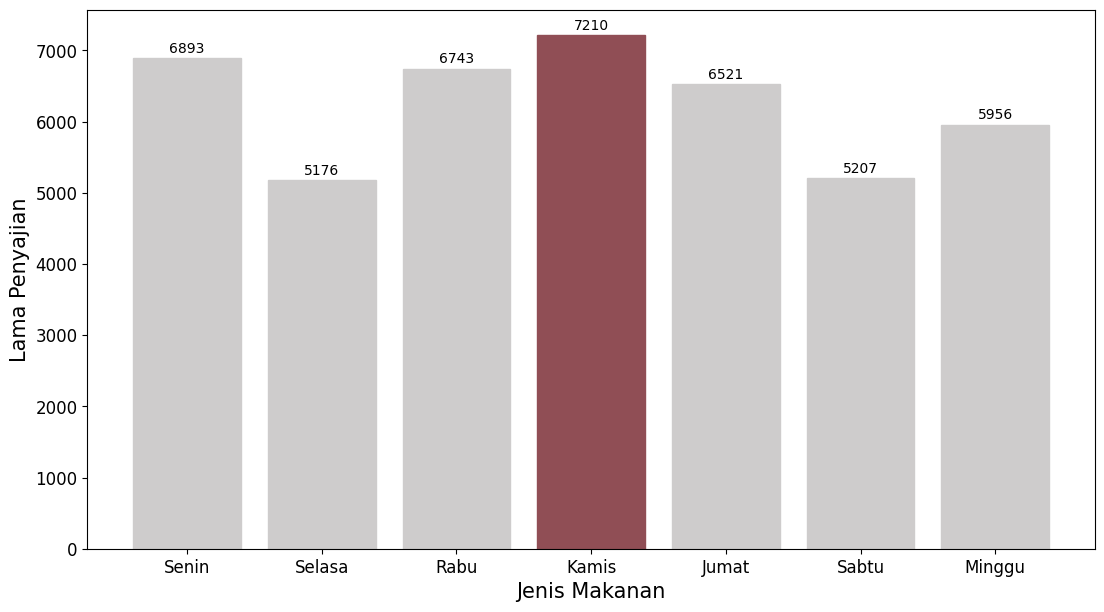

In [41]:
max_value = max(perday['count'])

figura = plt.figure(figsize=(13,7))
graph = figura.add_subplot()

barlist = graph.bar(nama_hari, perday['count'])
for i in range(len(barlist)):
    if perday['count'][i] == max_value:
        barlist[i].set_color('#904E55')
    else:
        barlist[i].set_color('#CECCCC')

plt.xlabel('Jenis Makanan', fontsize=15)
plt.ylabel('Lama Penyajian', fontsize=15)
graph.tick_params(axis='x', labelsize=12)
graph.tick_params(axis='y', labelsize=12)

for i, v in enumerate(perday['count']):
    graph.text(i, v+80, v, ha='center')


## Jumlah Order Dalam Rentang Waktu

In [42]:
rentang_waktu = df.groupby(df['waktu'])['count'].count().reset_index().sort_values('count', ascending=True)
rentang_waktu

,waktu,count
0,1,4388
1,2,5474
2,3,6958
3,4,26886


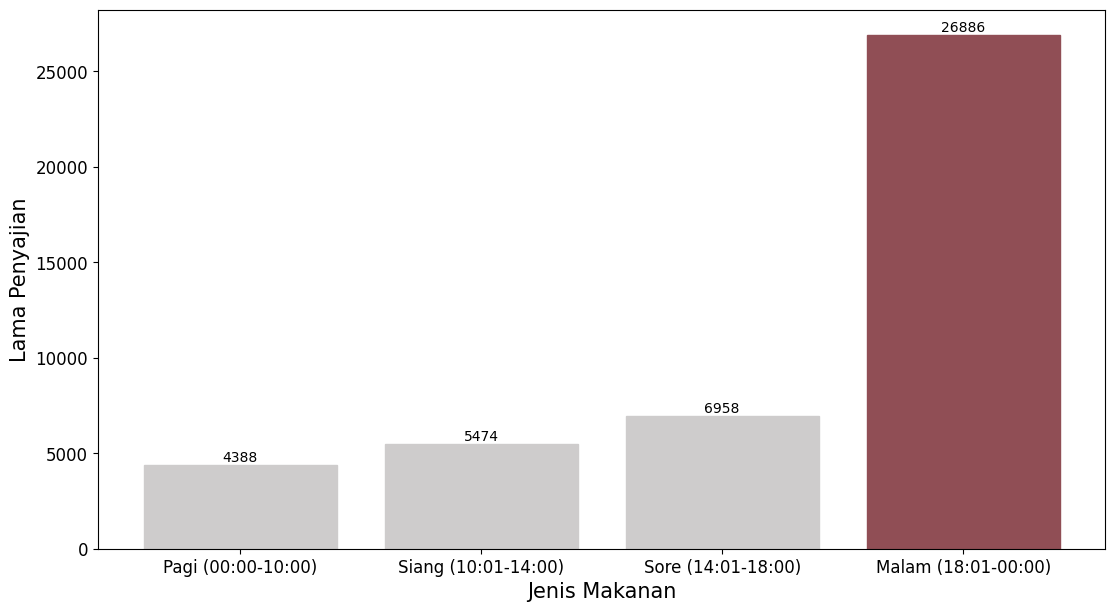

In [43]:
wkt = ['Pagi (00:00-10:00)', 'Siang (10:01-14:00)', 'Sore (14:01-18:00)', 'Malam (18:01-00:00)']
max_value = max(rentang_waktu['count'])

figura = plt.figure(figsize=(13,7))
graph = figura.add_subplot()

barlist = graph.bar(wkt, rentang_waktu['count'])
for i in range(len(barlist)):
    if rentang_waktu['count'][i] == max_value:
        barlist[i].set_color('#904E55')
    else:
        barlist[i].set_color('#CECCCC')

plt.xlabel('Jenis Makanan', fontsize=15)
plt.ylabel('Lama Penyajian', fontsize=15)
graph.tick_params(axis='x', labelsize=12)
graph.tick_params(axis='y', labelsize=12)

for i, v in enumerate(rentang_waktu['count']):
    graph.text(i, v+175, v, ha='center')

## Lama Waktu Penyajian Makanan

In [44]:
time_cooking = df.groupby(df['Type_of_order'])['cooking_time'].mean().reset_index().sort_values('Type_of_order', ascending=True)
time_cooking

,Type_of_order,cooking_time
0,1,10.014469
1,2,9.959909
2,3,9.960862
3,4,10.025430


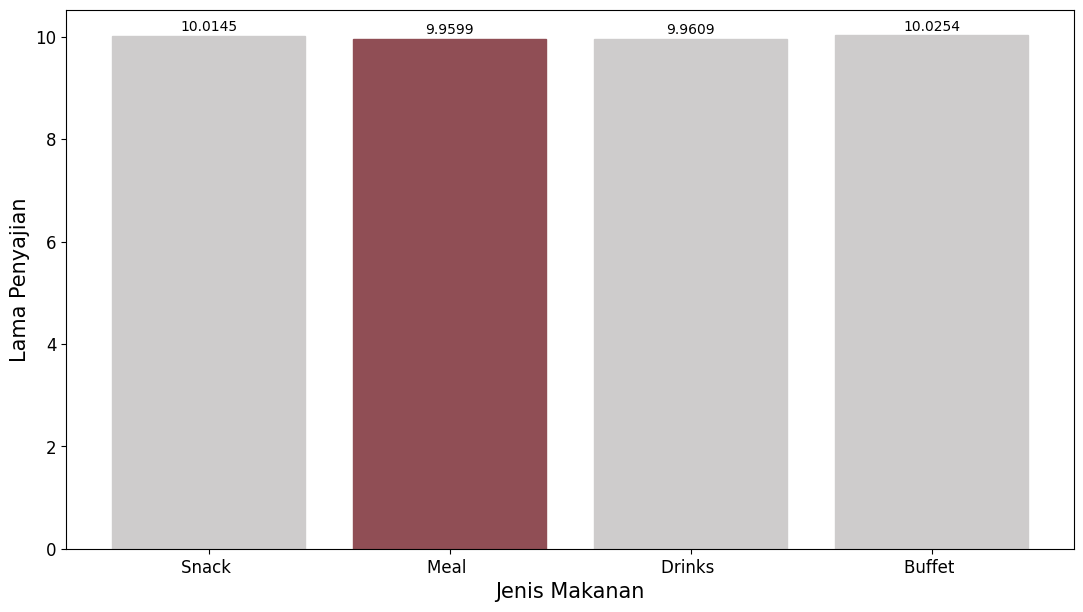

In [45]:
jenis_makanan = ['Snack ', 'Meal ', 'Drinks ', 'Buffet ']
min_value = min(time_cooking['cooking_time'])

figura = plt.figure(figsize=(13,7))
graph = figura.add_subplot()

barlist = graph.bar(jenis_makanan, time_cooking['cooking_time'])
for i in range(len(barlist)):
    if time_cooking['cooking_time'][i] == min_value:
        barlist[i].set_color('#904E55')
    else:
        barlist[i].set_color('#CECCCC')


plt.xlabel('Jenis Makanan', fontsize=15)
plt.ylabel('Lama Penyajian', fontsize=15)
graph.tick_params(axis='x', labelsize=12)
graph.tick_params(axis='y', labelsize=12)

for i, v in enumerate(time_cooking['cooking_time']):
    graph.text(i, v+0.1, round(v, 4), ha='center')

**insight yang didapat**

1. transaksi terbanyak terjadi pada bulan 3 sebanyak 20711 dan yang paling sedikit ada di bulan 8 yakni 923.
2. customer paling banyak melakukan order pada hari kamis.
3. customer paling banyak melakukan order pada malam hari (18:00 - 00:00).
4. tipe makanan yang paling cepat untuk disajikan dan diambil oleh driver adalah 'Drinks', selisih waktunya tidak jauh berbeda dengan jenis makanan lainnya.

## Multivariat Analisis

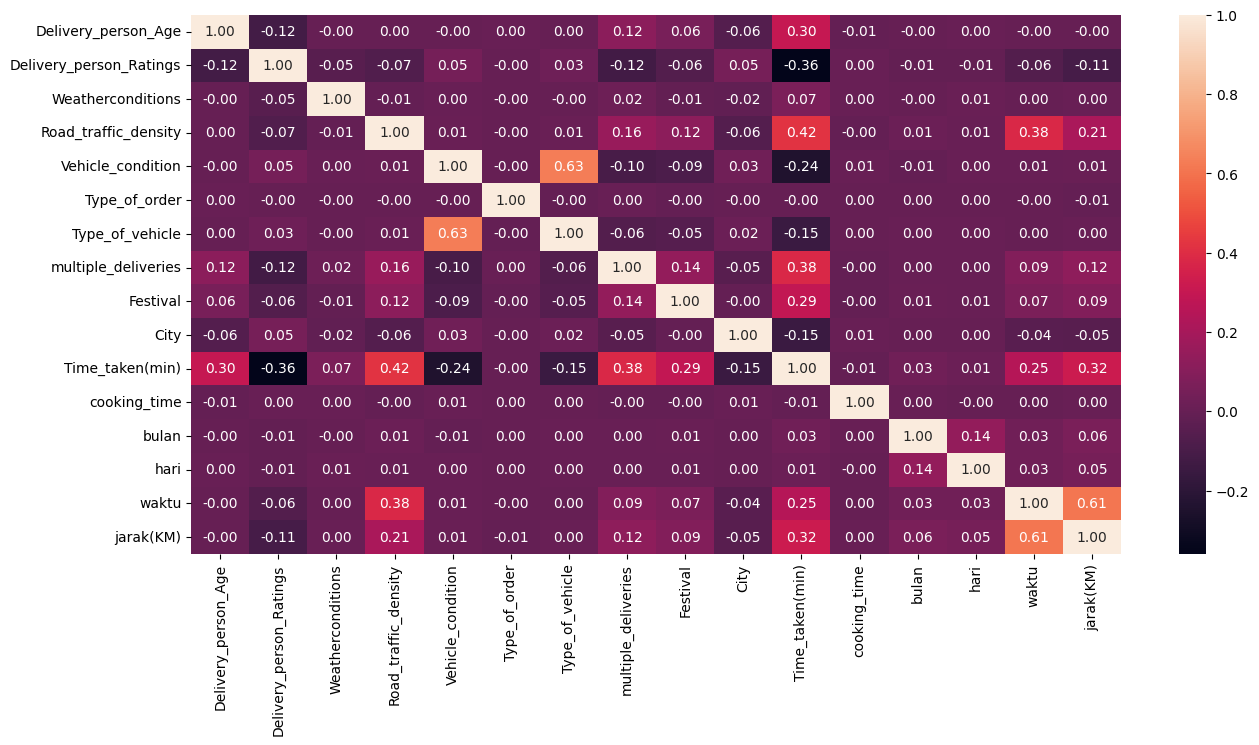

In [46]:
data_train = pd.concat([df.drop(columns=['Order_Date', 'Time_Orderd', 'Time_Order_picked', 'count']), 
                        df.drop(columns=['Order_Date', 'Time_Orderd', 'Time_Order_picked', 'count'])])
corr = data_train.corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Dari tabel diatas menunjukkan bahwa adanya hubungan yang negatif antara lama waktu yang dibutuhkan driver terhadap rating yang diberikan customer.

Sehingga semakin lama driver mengantarkan order semakin rendah rating yang diberikan oleh customer.

Adapun beberapa faktor yang dapat mempengaruhi lamanya waktu delivery adalah:
1. Usia driver, ada korelasi yang menunjukkan bahwa semakin tua usia driver maka waktu delivery juga akan cenderung lama
2. kepadatan lalu lintas, semakin padat lalu lintas yang dilalui oleh driver akan semakin lama pula waktu deliverynya
3. kondisi kendaraan, semakin prima kondisi kendaraan driver maka semakin cepat pula waktu deliverinya
4. banyaknya order, jika driver mengambil order lebih dari 1 secara bersamaan maka semakin lama juga waktu deliverynya
5. adanya festival atau event, jika terdapat festival/event yang diadakan oleh restoran tersebut maka akan cenderung meningkatkan lamanya delivery
6. waktu order, semakin petang/malam customer melakukan order maka akan lama pula waktu yang dibutuhkan untuk mengantar

ada pula driver yang menggunakan scooter electrik memiliki kondisi kendaraan yang lebih prima yang mana faktor ini sekaligus dapat memperlancar delivery.

selain itu, saat petang/malam hari cenderung terjadi kepadatan lalu lintas, dan pada malam hari juga customer cenderung memilih restoran yang jaraknya lebih jauh, mengingat bahwa malam hari juga adalah waktu dimana paling banyak customer melakukan order.

# **Split Data**

In [47]:
feature_1 = df.drop(columns=['Delivery_person_Ratings', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'count'])
target_1 = df[['Delivery_person_Ratings']]

# Split Data Train + Test
(x_train1, x_test1,
 y_train1, y_test1) = train_test_split(feature_1, target_1,
                                     test_size=0.20,
                                     random_state=42)

feature_2 = df.drop(columns=['Time_taken(min)', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'count'])
target_2 = df[['Time_taken(min)']]

# Split Data Train + Test
(x_train2, x_test2,
 y_train2, y_test2) = train_test_split(feature_2, target_2,
                                     test_size=0.20,
                                     random_state=42)


# **Machine Learning Model**

## Convert Data

In [48]:
x_reg_train1 = x_train1.to_numpy()
y_reg_train1 = y_train1.to_numpy()
y_reg_train1 = y_reg_train1.reshape(len(y_reg_train1))

x_reg_train2 = x_train2.to_numpy()
y_reg_train2 = y_train2.to_numpy()
y_reg_train2 = y_reg_train2.reshape(len(y_reg_train2))

x_reg_test1 = x_test1.to_numpy()
y_reg_test1 = y_test1.to_numpy()
y_reg_test1 = y_reg_test1.reshape(len(y_reg_test1))

## Linear Regression

In [49]:
simple_reg = LinearRegression()

simple_reg.fit(x_reg_train1, y_reg_train1)

LinearRegression()

In [50]:
coef_df = pd.DataFrame({
    'feature':['intercept'] + x_train2.columns.tolist(),
    'coefficient':[simple_reg.intercept_] + list(simple_reg.coef_)
})

coef_df

,feature,coefficient
0,intercept,4.999644
1,Delivery_person_Age,0.000417
2,Delivery_person_Ratings,-0.002896
3,Weatherconditions,0.027255
4,Road_traffic_density,-0.019999
5,Vehicle_condition,-0.000979
6,Type_of_order,-0.001992
7,Type_of_vehicle,0.008216
8,multiple_deliveries,0.087645
9,Festival,-0.003874


### Multicolinearity

In [74]:
X = add_constant(df.drop(columns=['Order_Date', 'Time_Orderd', 'Time_Order_picked']))

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
0,Delivery_person_Age,1.152584
1,Delivery_person_Ratings,1.165854
2,Weatherconditions,1.010019
3,Road_traffic_density,1.427573
4,Vehicle_condition,1.770513
5,Type_of_order,1.000137
6,Type_of_vehicle,1.663947
7,multiple_deliveries,1.169699
8,Festival,1.099324
9,City,1.025947


### Residual

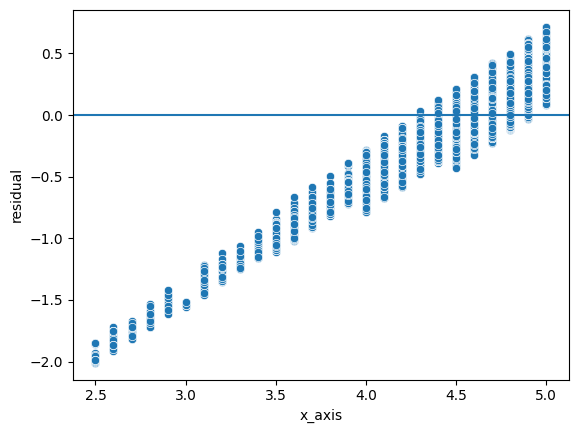

In [52]:
residual = y_reg_train1 - simple_reg.predict(x_reg_train1)

df_residual = pd.DataFrame({
    'x_axis': y_reg_train1.reshape(len(x_reg_train1)),
    'residual': residual
})

sns.scatterplot(data=df_residual, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

### QQ Plot

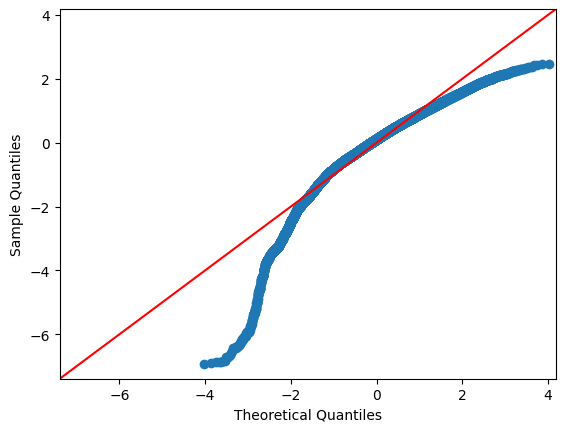

In [53]:
std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

### Asumsi Linear Regression:

1. Uji normalitas residual menggunakan QQ-plot : Cenderung tidak berdistribusi normal.
2. Multicollinearity : nilai VIF pada tiap fitur tidak lebih besar dari 4 dan tidak saling berkorelasi dengan target.
3. Linearitas : dari residual plot didapatkan bentuk linear sehingga asumsi linearitas tidak terpenuhi (jika fitur prediktor lebih dari 1 untuk menguji linearitasnya dapat menggunakan scater plot dari residual, dari scater plot jika berbentuk non-linear maka maka asumsi linearitas terpenuhi)
4. Homoskedastisitas : varians tidak menyebar secara merata

## Ridge Regression

In [54]:
ridge_reg = Ridge(random_state=42)

In [55]:
rr_parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20, 25)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, rr_parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(x_reg_train1, y_reg_train1)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 25)},
             scoring='neg_root_mean_squared_error')

In [56]:
pd.DataFrame(ridge_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003125,0.006250,0.003125,0.006249,0.000001,{'alpha': 1e-06},-0.294530,-0.291995,-0.284679,-0.288955,-0.291541,-0.290340,0.003338,11
1,0.003125,0.006250,0.000000,0.000000,0.00001,{'alpha': 1e-05},-0.294530,-0.291995,-0.284679,-0.288955,-0.291541,-0.290340,0.003338,10
2,0.006250,0.007655,0.000000,0.000000,0.0001,{'alpha': 0.0001},-0.294530,-0.291995,-0.284679,-0.288955,-0.291541,-0.290340,0.003338,9
3,0.006250,0.007655,0.000000,0.000000,0.001,{'alpha': 0.001},-0.294530,-0.291995,-0.284679,-0.288955,-0.291541,-0.290340,0.003338,8
4,0.006250,0.007654,0.000000,0.000000,0.01,{'alpha': 0.01},-0.294530,-0.291995,-0.284679,-0.288955,-0.291541,-0.290340,0.003338,7
5,0.003126,0.006252,0.003125,0.006250,0.1,{'alpha': 0.1},-0.294530,-0.291995,-0.284679,-0.288955,-0.291541,-0.290340,0.003338,6
6,0.003124,0.006248,0.000000,0.000000,1,{'alpha': 1},-0.294530,-0.291994,-0.284679,-0.288955,-0.291542,-0.290340,0.003338,5
7,0.006251,0.007656,0.000000,0.000000,5,{'alpha': 5},-0.294532,-0.291989,-0.284678,-0.288957,-0.291543,-0.290340,0.003338,4
8,0.006250,0.007655,0.000000,0.000000,10,{'alpha': 10},-0.294533,-0.291984,-0.284678,-0.288958,-0.291544,-0.290339,0.003338,3
9,0.003125,0.006249,0.000000,0.000000,20,{'alpha': 20},-0.294537,-0.291973,-0.284677,-0.288962,-0.291547,-0.290339,0.003338,2


In [57]:
coef_df = pd.DataFrame({
    'feature':['intercept'] + x_train1.columns.tolist(),
    'coefficient':[ridge_reg_gridcv.best_estimator_.intercept_] + list(ridge_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,4.999349
1,Delivery_person_Age,0.000413
2,Weatherconditions,-0.002904
3,Road_traffic_density,0.027233
4,Vehicle_condition,-0.019967
5,Type_of_order,-0.000980
6,Type_of_vehicle,-0.002014
7,multiple_deliveries,0.008226
8,Festival,0.084210
9,City,-0.003820


## Random Forest

In [58]:
rf = RandomForestRegressor(random_state=42)

In [59]:
rf_parameters = {
    'n_estimators': (5, 10, 20, 30, 50, 80, 100),
    'min_samples_leaf': (2, 3, 4, 5, 8, 10)
}

# the tuning
rf_gridcv = GridSearchCV(rf, rf_parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
rf_gridcv.fit(x_reg_train1, y_reg_train1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'min_samples_leaf': (2, 3, 4, 5, 8, 10),
                         'n_estimators': (5, 10, 20, 30, 50, 80, 100)},
             scoring='neg_root_mean_squared_error')

In [60]:
rfmodel = pd.DataFrame(rf_gridcv.cv_results_)
rfmodel.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,5.416558,0.027716,0.078126,0.000002,10,100,"{'min_samples_leaf': 10, 'n_estimators': 100}",-0.214084,-0.213345,-0.213446,-0.213842,-0.213029,-0.213549,0.000373,1
40,4.352695,0.021171,0.066126,0.006077,10,80,"{'min_samples_leaf': 10, 'n_estimators': 80}",-0.214245,-0.213206,-0.213562,-0.213861,-0.212978,-0.213570,0.000452,2
34,5.671754,0.043189,0.082627,0.006166,8,100,"{'min_samples_leaf': 8, 'n_estimators': 100}",-0.214468,-0.213619,-0.213996,-0.214214,-0.213270,-0.213913,0.000426,3
39,2.722399,0.018208,0.037501,0.007655,10,50,"{'min_samples_leaf': 10, 'n_estimators': 50}",-0.214446,-0.213697,-0.214069,-0.214169,-0.213306,-0.213937,0.000397,4
33,4.493146,0.034460,0.072975,0.006544,8,80,"{'min_samples_leaf': 8, 'n_estimators': 80}",-0.214642,-0.213475,-0.214081,-0.214368,-0.213174,-0.213948,0.000547,5
32,2.826260,0.017658,0.045969,0.001819,8,50,"{'min_samples_leaf': 8, 'n_estimators': 50}",-0.214807,-0.213912,-0.214584,-0.214623,-0.213299,-0.214245,0.000562,6
38,1.631430,0.015783,0.018752,0.006251,10,30,"{'min_samples_leaf': 10, 'n_estimators': 30}",-0.214717,-0.214152,-0.214640,-0.214601,-0.213621,-0.214346,0.000413,7
37,1.084452,0.007753,0.015628,0.000002,10,20,"{'min_samples_leaf': 10, 'n_estimators': 20}",-0.214770,-0.214212,-0.214872,-0.215220,-0.213962,-0.214607,0.000457,8
31,1.700096,0.011720,0.021874,0.007655,8,30,"{'min_samples_leaf': 8, 'n_estimators': 30}",-0.215102,-0.214312,-0.215188,-0.215130,-0.213496,-0.214646,0.000659,9
27,6.203373,0.070880,0.093801,0.000101,5,100,"{'min_samples_leaf': 5, 'n_estimators': 100}",-0.215697,-0.215238,-0.214801,-0.215291,-0.214292,-0.215064,0.000479,10


## XGBoost

In [61]:
xgb = XGBRegressor(random_state=42)

# Define the parameter grid
xgb_parameters = {'gamma': [0, 1, 2, 5, 10, 20, 50], 
                  'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1]}

xgb_gridcv = GridSearchCV(xgb, xgb_parameters, cv=5, 
                          scoring='neg_root_mean_squared_error')

xgb_gridcv.fit(x_reg_train1, y_reg_train1)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'gamma': [0, 1, 2, 5, 10, 20, 50],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [62]:
XGB_result = pd.DataFrame(xgb_gridcv.cv_results_)
XGB_result.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.518055,0.066597,0.002200,0.000400,1,0.2,"{'gamma': 1, 'learning_rate': 0.2}",-0.212914,-0.213236,-0.211951,-0.211824,-0.212855,-0.212556,0.000562,1
10,0.480368,0.031953,0.004724,0.005559,1,0.5,"{'gamma': 1, 'learning_rate': 0.5}",-0.211739,-0.212891,-0.212805,-0.212407,-0.213305,-0.212630,0.000529,2
8,0.501267,0.017456,0.002200,0.000401,1,0.1,"{'gamma': 1, 'learning_rate': 0.1}",-0.213282,-0.213538,-0.212561,-0.211905,-0.213100,-0.212877,0.000582,3
11,0.506250,0.007655,0.000000,0.000000,1,1,"{'gamma': 1, 'learning_rate': 1}",-0.213333,-0.213565,-0.212182,-0.211518,-0.214324,-0.212984,0.001005,4
17,0.478233,0.027203,0.003125,0.006249,2,1,"{'gamma': 2, 'learning_rate': 1}",-0.212925,-0.214481,-0.212159,-0.211891,-0.214528,-0.213197,0.001120,5
16,0.509381,0.018756,0.000000,0.000000,2,0.5,"{'gamma': 2, 'learning_rate': 0.5}",-0.212846,-0.213067,-0.213967,-0.212580,-0.213553,-0.213203,0.000498,6
2,0.483401,0.003442,0.004799,0.000747,0,0.1,"{'gamma': 0, 'learning_rate': 0.1}",-0.214057,-0.213533,-0.213141,-0.212549,-0.213945,-0.213445,0.000553,7
15,0.496875,0.015309,0.006250,0.007654,2,0.2,"{'gamma': 2, 'learning_rate': 0.2}",-0.214710,-0.214625,-0.213927,-0.212862,-0.213893,-0.214003,0.000664,8
14,0.515779,0.026299,0.000000,0.000000,2,0.1,"{'gamma': 2, 'learning_rate': 0.1}",-0.215309,-0.215372,-0.214003,-0.213580,-0.214735,-0.214600,0.000709,9
23,0.496909,0.022992,0.000000,0.000000,5,1,"{'gamma': 5, 'learning_rate': 1}",-0.215220,-0.215864,-0.214766,-0.212510,-0.215333,-0.214739,0.001168,10


# **Evaluasi**

## Linear Regression

In [63]:
# Train Data
lin_pred = simple_reg.predict(x_reg_train1)
rmse = np.sqrt(mean_squared_error(y_reg_train1, lin_pred))
r2s = r2_score(y_reg_train1,lin_pred)
mape = mean_absolute_percentage_error(y_reg_train1,lin_pred)

print(f'''RMSE = {rmse}
R2 Score = {r2s}
MAPE = {round(mape*100, 3)}%''')

RMSE = 0.29019903994329593
R2 Score = 0.14446772031928723
MAPE = 4.877%


In [64]:
# Test Data
lin_pred = simple_reg.predict(x_reg_test1)
rmse = np.sqrt(mean_squared_error(y_reg_test1, lin_pred))
r2s = r2_score(y_reg_test1,lin_pred)
mape = mean_absolute_percentage_error(y_reg_test1,lin_pred)

print(f'''RMSE = {rmse}
R2 Score = {r2s}
MAPE = {round(mape*100, 3)}%''')

RMSE = 0.28848614914319315
R2 Score = 0.13232407143778802
MAPE = 4.858%


## Ridge Regression

In [65]:
# Train Data
lin_pred = ridge_reg_gridcv.best_estimator_.predict(x_reg_train1)
rmse = np.sqrt(mean_squared_error(y_reg_train1, lin_pred))
r2s = r2_score(y_reg_train1,lin_pred)
mape = mean_absolute_percentage_error(y_reg_train1,lin_pred)

print(f'''RMSE = {rmse}
R2 Score = {r2s}
MAPE = {round(mape*100, 3)}%''')

RMSE = 0.29019939823046553
R2 Score = 0.14446560779384066
MAPE = 4.877%


In [66]:
# Test Data
lin_pred = ridge_reg_gridcv.best_estimator_.predict(x_reg_test1)
rmse = np.sqrt(mean_squared_error(y_reg_test1, lin_pred))
r2s = r2_score(y_reg_test1,lin_pred)
mape = mean_absolute_percentage_error(y_reg_test1,lin_pred)

print(f'''RMSE = {rmse}
R2 Score = {r2s}
MAPE = {round(mape*100, 3)}%''')

RMSE = 0.2884971852407773
R2 Score = 0.13225768392207027
MAPE = 4.858%


## Random Forest Regressor

In [67]:
# Train Data
lin_pred = rf_gridcv.best_estimator_.predict(x_reg_train1)
rmse = np.sqrt(mean_squared_error(y_reg_train1, lin_pred))
r2s = r2_score(y_reg_train1,lin_pred)
mape = mean_absolute_percentage_error(y_reg_train1,lin_pred)

print(f'''RMSE = {rmse}
R2 Score = {r2s}
MAPE = {round(mape*100, 3)}%''')

RMSE = 0.17799223987605087
R2 Score = 0.6781551276808229
MAPE = 3.155%


In [68]:
# Test Data
lin_pred = rf_gridcv.best_estimator_.predict(x_reg_test1)
rmse = np.sqrt(mean_squared_error(y_reg_test1, lin_pred))
r2s = r2_score(y_reg_test1,lin_pred)
mape = mean_absolute_percentage_error(y_reg_test1,lin_pred)

print(f'''RMSE = {rmse}
R2 Score = {r2s}
MAPE = {round(mape*100, 3)}%''')

RMSE = 0.21532699440350972
R2 Score = 0.516602307479064
MAPE = 3.823%


    Pada model random forest regressor terjadi overfitting

## XG-Boost

In [69]:
# Train Data
lin_pred = xgb_gridcv.best_estimator_.predict(x_reg_train1)
rmse = np.sqrt(mean_squared_error(y_reg_train1, lin_pred))
r2s = r2_score(y_reg_train1,lin_pred)
mape = mean_absolute_percentage_error(y_reg_train1,lin_pred)

print(f'''RMSE = {rmse}
R2 Score = {r2s}
MAPE = {round(mape*100, 3)}%''')

RMSE = 0.21111506503885205
R2 Score = 0.5472245108243833
MAPE = 3.787%


In [70]:
# Test Data
lin_pred = xgb_gridcv.best_estimator_.predict(x_reg_test1)
rmse = np.sqrt(mean_squared_error(y_reg_test1, lin_pred))
r2s = r2_score(y_reg_test1,lin_pred)
mape = mean_absolute_percentage_error(y_reg_test1,lin_pred)

print(f'''RMSE = {rmse}
R2 Score = {r2s}
MAPE = {round(mape*100, 3)}%''')

RMSE = 0.2136957247407238
R2 Score = 0.5238987920220157
MAPE = 3.817%


## SHAP

In [71]:
explainer = shap.Explainer(xgb_gridcv.best_estimator_, x_reg_train1)
shap_values = explainer(x_reg_test1)

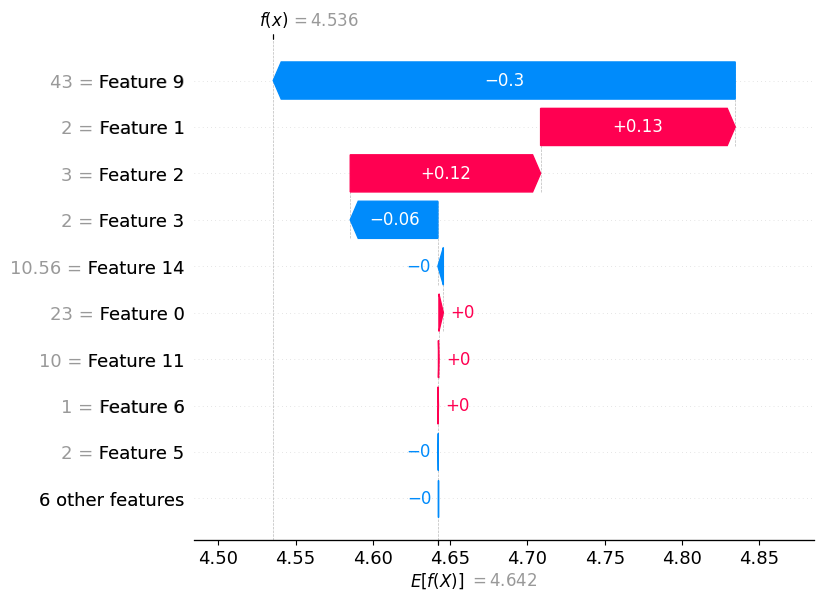

In [72]:
shap.plots.waterfall(shap_values[0])
